In [1]:
cd
use "..\Data\relative_wage"
sort year
merge m:1 year using "../Data/relative_supply", keep(match) nogenerate
replace year = year-1




C:\Users\Rafael\Eco 797 - Practicum in Empirical Analysis\Analysis




    Result                           # of obs.
    -----------------------------------------
    not matched                             0
    matched                                57  
    -----------------------------------------

(57 real changes made)


In [2]:
list year college_hs_gap college_hs_supply


     +-----------------------------+
     | year   colleg~p   college~y |
     |-----------------------------|
  1. | 1963   .3821373   -.7918856 |
  2. | 1964   .3981619   -.7444239 |
  3. | 1965   .4123693   -.7511503 |
  4. | 1966   .4232306   -.7342879 |
  5. | 1967   .4420724    -.671908 |
     |-----------------------------|
  6. | 1968   .4467039   -.6682243 |
  7. | 1969   .4374728    -.624491 |
  8. | 1970   .4297104   -.5646536 |
  9. | 1971   .4567652   -.5354807 |
 10. | 1972   .4394598   -.4951653 |
     |-----------------------------|
 11. | 1973   .4370584   -.4356841 |
 12. | 1974   .4203458   -.3676135 |
 13. | 1975   .4123511   -.3160161 |
 14. | 1976   .4103203   -.2845219 |
 15. | 1977   .3933167    -.261696 |
     |-----------------------------|
 16. | 1978   .3803658   -.2226935 |
 17. | 1979   .3879089   -.1967725 |
 18. | 1980   .3854618   -.1667217 |
 19. | 1981   .3847647   -.1223423 |
 20. | 1982   .4120359   -.0274082 |
     |-----------------------------|


In [3]:
gen time = year - 1962
gen time_squared = time* time
gen time_post92 =  max(year-1992,0) 


In [4]:
reg college_hs_gap time if year <= 2005
predict gap_detrended, resid 
 
reg college_hs_gap time 
predict gap_detrended_all, resid 



      Source |       SS           df       MS      Number of obs   =        43
-------------+----------------------------------   F(1, 41)        =    168.82
       Model |  .269289764         1  .269289764   Prob > F        =    0.0000
    Residual |  .065398774        41  .001595092   R-squared       =    0.8046
-------------+----------------------------------   Adj R-squared   =    0.7998
       Total |  .334688538        42  .007968775   Root MSE        =    .03994

------------------------------------------------------------------------------
college_hs~p |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        time |    .006377   .0004908    12.99   0.000     .0053858    .0073682
       _cons |   .3528281   .0123968    28.46   0.000     .3277923    .3778639
------------------------------------------------------------------------------



      Source |       SS           df       MS 

In [5]:
reg college_hs_supply time if year <= 2005
predict supply_detrended, resid

reg college_hs_supply time 
predict supply_detrended_all, resid




      Source |       SS           df       MS      Number of obs   =        43
-------------+----------------------------------   F(1, 41)        =    961.55
       Model |  5.28054391         1  5.28054391   Prob > F        =    0.0000
    Residual |  .225158615        41  .005491674   R-squared       =    0.9591
-------------+----------------------------------   Adj R-squared   =    0.9581
       Total |  5.50570252        42  .131088155   Root MSE        =    .07411

------------------------------------------------------------------------------
college_hs~y |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        time |   .0282387   .0009107    31.01   0.000     .0263996    .0300778
       _cons |  -.7399776   .0230021   -32.17   0.000    -.7864313   -.6935238
------------------------------------------------------------------------------



      Source |       SS           df       MS 

In [6]:
replace gap_detrended = gap_detrended * 100
replace supply_detrended = supply_detrended * 100


(57 real changes made)

(57 real changes made)


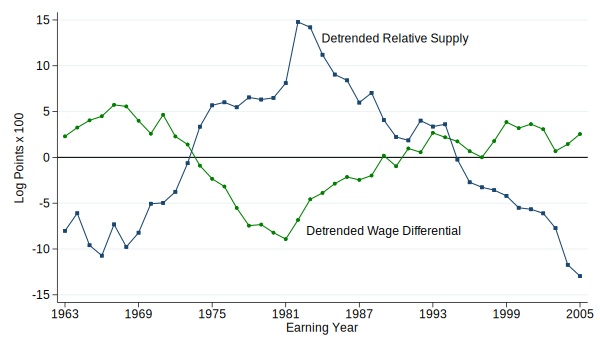




(file ..\Results\figure4a-05.pdf written in PDF format)


In [7]:
twoway connected gap_detrended supply_detrended year if year <=2005, sort msize(small small) ///
msymbol(o s) mcolor(green navy) lcolor(green navy) xtitle(Earning Year) xlabel(1963(6)2005) ///
ytitle(Log Points x 100) ylabel(-15(5)15, angle(0)) graphregion(color(white)) xsize(6) ysize(3.5) ///
yline(0, lcolor(black)) text(13 1990 "Detrended Relative Supply") ///
text(-8 1989 "Detrended Wage Differential") legend(off)
graph export "..\Results\figure4a-05.pdf", as(pdf) replace


In [8]:
replace gap_detrended_all = gap_detrended_all * 100
replace supply_detrended_all = supply_detrended_all * 100


(57 real changes made)

(57 real changes made)


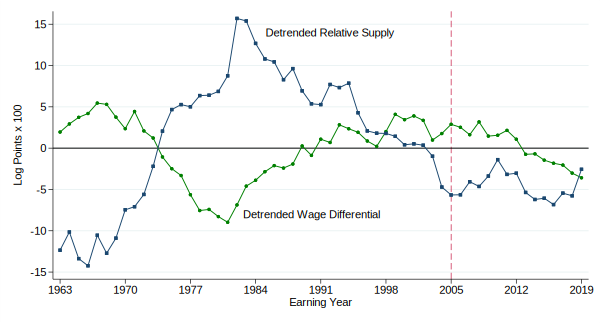




(file ..\Results\figure4a-19.pdf written in PDF format)


In [9]:
twoway connected gap_detrended_all supply_detrended_all year, sort msize(small small) ///
msymbol(o s) mcolor(green navy) lcolor(green navy) xtitle(Earning Year) xlabel(1963(7)2019) ///
ytitle(Log Points x 100) ylabel(-15(5)15, angle(0)) graphregion(color(white)) xsize(6.5) ysize(3.5) ///
yline(0, lcolor(black)) text(14 1992 "Detrended Relative Supply") ///
text(-8 1990 "Detrended Wage Differential") xline(2005, lwidth(thin) lcolor(cranberry) lpattern(dash))  legend(off)
graph export "..\Results\figure4a-19.pdf", as(pdf) replace


In [10]:
reg college_hs_gap time college_hs_supply if year<1988
predict gap6387
 
reg college_hs_gap time college_hs_supply
predict gap_all

reg college_hs_gap time college_hs_supply if year >= 2005 
predict gap_2005



      Source |       SS           df       MS      Number of obs   =        25
-------------+----------------------------------   F(2, 22)        =     11.05
       Model |  .011945427         2  .005972714   Prob > F        =    0.0005
    Residual |  .011887259        22   .00054033   R-squared       =    0.5012
-------------+----------------------------------   Adj R-squared   =    0.4559
       Total |  .023832686        24  .000993029   Root MSE        =    .02324

-------------------------------------------------------------------------------
college_hs_~p |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
         time |   .0244182     .00551     4.43   0.000     .0129912    .0358451
college_hs_~y |  -.6033229   .1430562    -4.22   0.000    -.9000034   -.3066424
        _cons |  -.1081448   .1227109    -0.88   0.388    -.3626317    .1463421
-------------------------------------------

In [11]:
replace college_hs_gap = college_hs_gap *100
replace gap6387 = gap6387 *100
replace gap_all = gap_all *100



(57 real changes made)

(57 real changes made)

(57 real changes made)


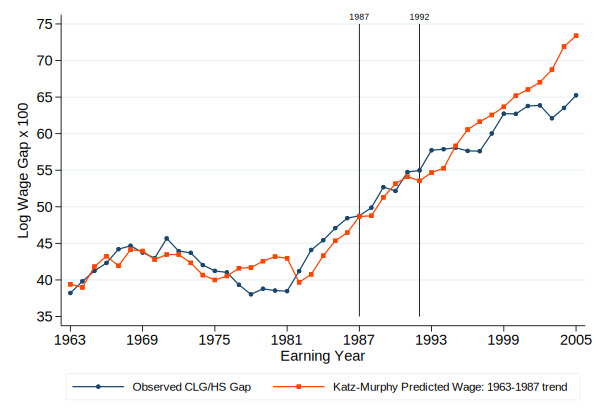




(file ..\Results\figure4b-05.pdf written in PDF format)


In [12]:
twoway connected college_hs_gap gap6387 year if year <=2005, sort msize(small small) ///
msymbol(o s) mcolor(navy orange_red) lcolor(navy orange_red) xtitle(Earning Year) xlabel(1963(6)2005) ///
ytitle(Log Wage Gap x 100) ylabel(35(5)75, angle(0)) graphregion(color(white)) xsize(5) ysize(3.5) ///
xline(1992, lwidth(thin) lcolor(black) noextend) text(76 1992 "1992",size(vsmall))  ///
xline(1987, lwidth(thin) lcolor(black) noextend) text(76 1987 "1987",size(vsmall))  ///
legend(size(small) label( 1 "Observed CLG/HS Gap") ///
label( 2 "Katz-Murphy Predicted Wage: 1963-1987 trend") region(lstyle(none)))
graph export "..\Results\figure4b-05.pdf", as(pdf) replace


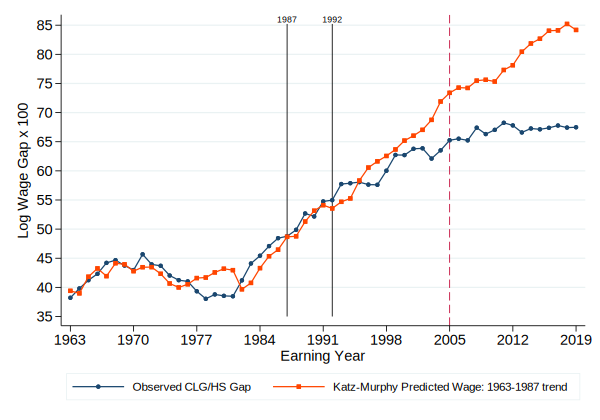




(file ..\Results\figure4b-19.pdf written in PDF format)


In [13]:
twoway connected college_hs_gap gap6387 year, sort msize(small small) ///
msymbol(o s) mcolor(navy orange_red) lcolor(navy orange_red) xtitle(Earning Year) xlabel(1963(7)2019) ///
ytitle(Log Wage Gap x 100) ylabel(35(5)85, angle(0)) graphregion(color(white)) xsize(5) ysize(3.5) ///
xline(1992, lwidth(thin) lcolor(black) noextend) text(86 1992 "1992",size(vsmall)) ///
xline(1987, lwidth(thin) lcolor(black) noextend) text(86 1987 "1987",size(vsmall)) ///
xline(2005, lwidth(thin) lcolor(cranberry) lpattern(dash)) ///
legend(size(small) label( 1 "Observed CLG/HS Gap") ///
label( 2 "Katz-Murphy Predicted Wage: 1963-1987 trend") region(lstyle(none)))
graph export "..\Results\figure4b-19.pdf", as(pdf) replace


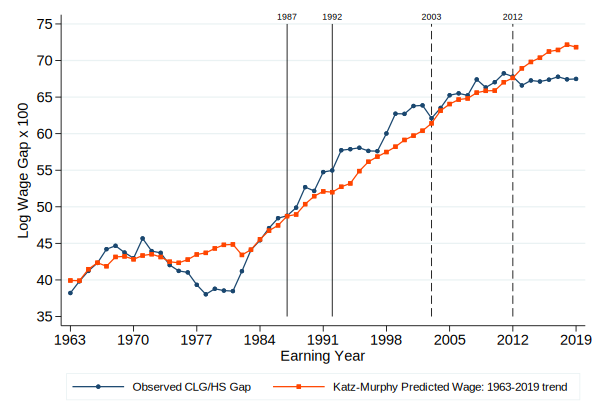




(file ..\Results\figure4c-19.pdf written in PDF format)


In [14]:
twoway connected college_hs_gap gap_all year, sort msize(small small) ///
msymbol(o s) mcolor(navy orange_red) lcolor(navy orange_red) xtitle(Earning Year) xlabel(1963(7)2019) ///
ytitle(Log Wage Gap x 100) ylabel(35(5)75, angle(0)) graphregion(color(white)) xsize(5) ysize(3.5) ///
xline(1992, lwidth(thin) lcolor(black) noextend) text(76 1992 "1992",size(vsmall))  ///
xline(1987, lwidth(thin) lcolor(black) noextend) text(76 1987 "1987",size(vsmall)) ///
xline(2003, lwidth(thin) lcolor(black) lpattern(dash) noextend) text(76 2003 "2003",size(vsmall)) ///
xline(2012, lwidth(thin) lcolor(black) lpattern(dash) noextend) text(76 2012 "2012",size(vsmall)) ///
legend(size(small) label( 1 "Observed CLG/HS Gap") ///
label( 2 "Katz-Murphy Predicted Wage: 1963-2019 trend") region(lstyle(none)))
graph export "..\Results\figure4c-19.pdf", as(pdf) replace
